In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
file_path = "../scraper/scraped_data/data_selenium.json"
# Load JSON file
with open(file_path) as file:
    data = json.load(file)

In [71]:
# Convert to pandas dataframe
df = pd.DataFrame(data)
df.head()

,url,title,texts,images,pdf_links,pdf_extracted,image_extracted,scraped_at
0,https://www.svf.gov.lk/index.php?option=com_co...,home,health clinics and eye clinics eye clinic empo...,[https://www.svf.gov.lk/templates/svf-poora/im...,[],,shrama vasana fund ministry of labour and fore...,1.727907e+09
1,https://www.svf.gov.lk/index.php?option=com_co...,overview,overview vision contended sri lankan work forc...,[https://www.svf.gov.lk/templates/svf-poora/im...,[],,shrama vasana fund ministry of labour and fore...,1.727907e+09
2,https://www.svf.gov.lk/index.php?option=com_co...,our team,our team present office bearers of the shrama ...,[https://www.svf.gov.lk/templates/svf-poora/im...,[],,shrama vasana fund ministry of labour and fore...,1.727907e+09
3,https://www.svf.gov.lk/index.php?option=com_co...,organisation structure,organisation structure falang translation syst...,[https://www.svf.gov.lk/templates/svf-poora/im...,[],,shrama vasana fund ministry of labour and fore...,1.727907e+09
4,https://www.svf.gov.lk/index.php?option=com_co...,contributions,contributions services supported by your donat...,[https://www.svf.gov.lk/templates/svf-poora/im...,[],,shrama vasana fund ministry of labour and fore...,1.727907e+09


In [132]:
len(df)

16

In [72]:
print(f"Number of unique urls scraped: {df['url'].nunique()}")
print(f"Number of unique titles scraped: {df['title'].nunique()}")

images = [image for sublist in df['images'] for image in sublist]
unique_images = set(images)
print(f"Number of unique images scraped: {len(unique_images)}")

pdf_links = [pdf for sublist in df['pdf_links'] for pdf in sublist]
unique_pdfs = set(pdf_links)
print(f"Number of unique pdfs scraped: {len(unique_pdfs)}")


Number of unique urls scraped: 16
Number of unique titles scraped: 16
Number of unique images scraped: 94
Number of unique pdfs scraped: 15


In [73]:
texts = list(df['texts'])

In [126]:
def count_words(text_list): 
    word_count = 0 
    for sentence in text_list: 
        word_count += len(sentence.split())
    return word_count

print(f"Total word count of webpage texts: {count_words(texts)}")

Word count of all webpage texts: 3636


In [131]:
# Average word count per webpage
def average_word_count(text_list): 
    word_counts = []
    for text in text_list:
        word_count = len(text.split()) 
        word_counts.append(word_count)  

    return sum(word_counts)/len(word_counts)
print(f"Average word count per webpage: {average_word_count(texts)}")

Average word count per webpage: 227.25


In [76]:
def plot_word_cloud(texts):
    combined_text = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

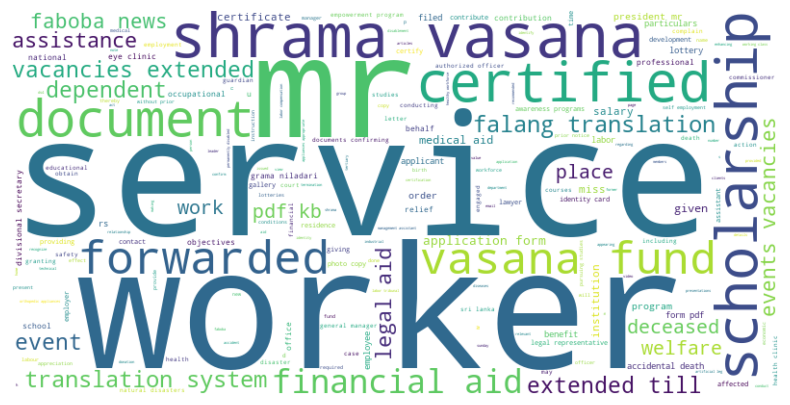

In [77]:
# Plot word cloud for texts
plot_word_cloud(texts)

In [78]:
pdf_texts = list(df['pdf_extracted'])

In [79]:
print(f"Word count of all pdf_texts: {count_words(pdf_texts)}")

Word count of all pdf_texts: 5044


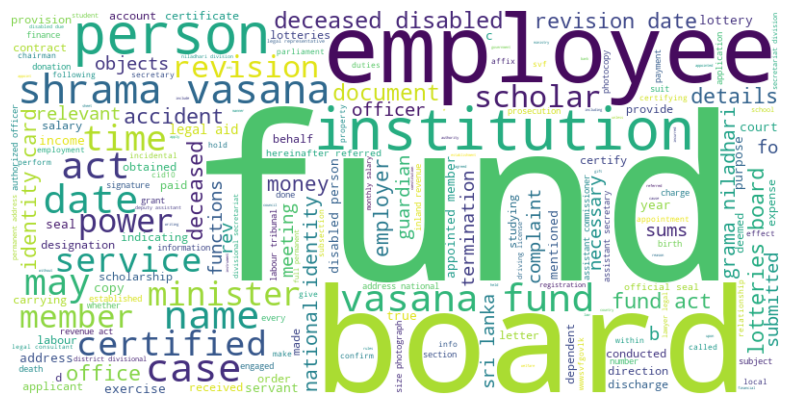

In [80]:
# Plot word cloud for pdf texts
plot_word_cloud(pdf_texts)

In [81]:
image_texts = list(df['image_extracted'])

In [82]:
print(f"Word count of all image_texts: {count_words(image_texts)}")

Word count of all image_texts: 261


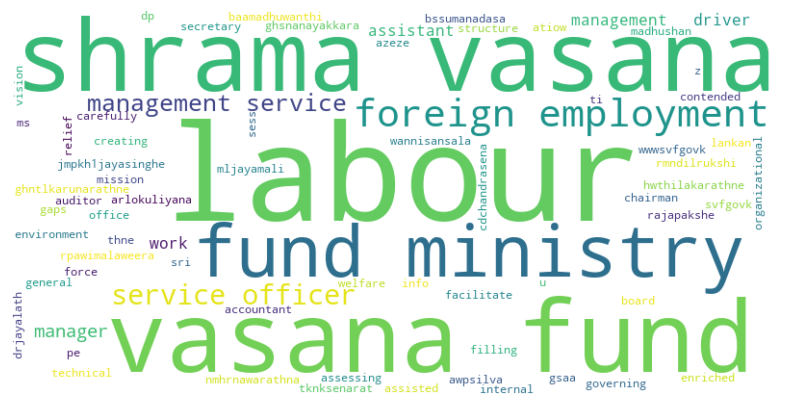

In [83]:
# Plot word cloud for image texts
plot_word_cloud(image_texts)

In [87]:
def get_top_words(text_list, num_words):
  CV = CountVectorizer(stop_words='english') 
  word_count = CV.fit_transform(text_list)

  word_sum = word_count.sum(axis=0)

  frequency = []
  for word, index in CV.vocabulary_.items():
    frequency.append((word, word_sum[0, index]))

  frequency = sorted(frequency, key=lambda x: x[1], reverse=True)[:num_words]
  return frequency

In [108]:
def top_words_chart(texts, title): 
    texts = get_top_words(texts, 10)
    words = [] 
    freqs = []
    for text, freq in texts: 
        words.append(text)
        freqs.append(freq)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=words)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.show()
    
        

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


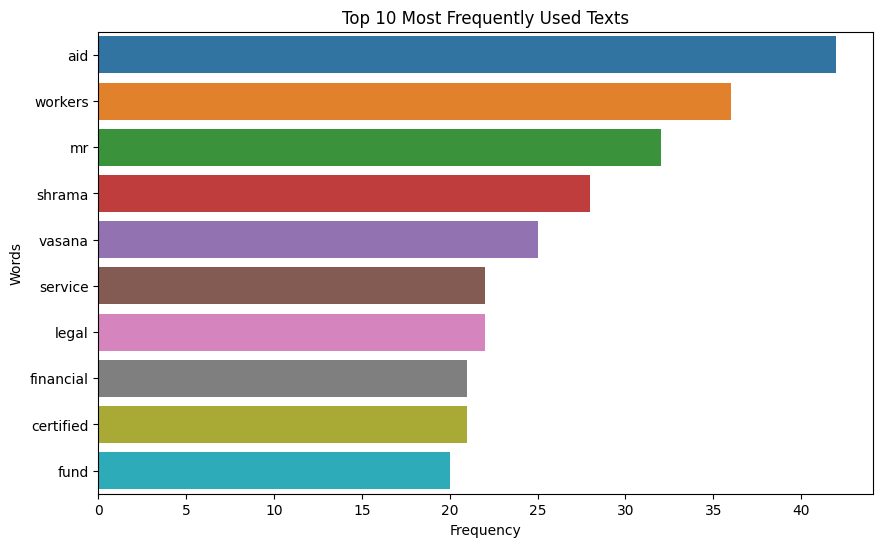

In [109]:
# Top 10 most frequently used texts
top_words_chart(texts, 'Top 10 Most Frequently Used Texts')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


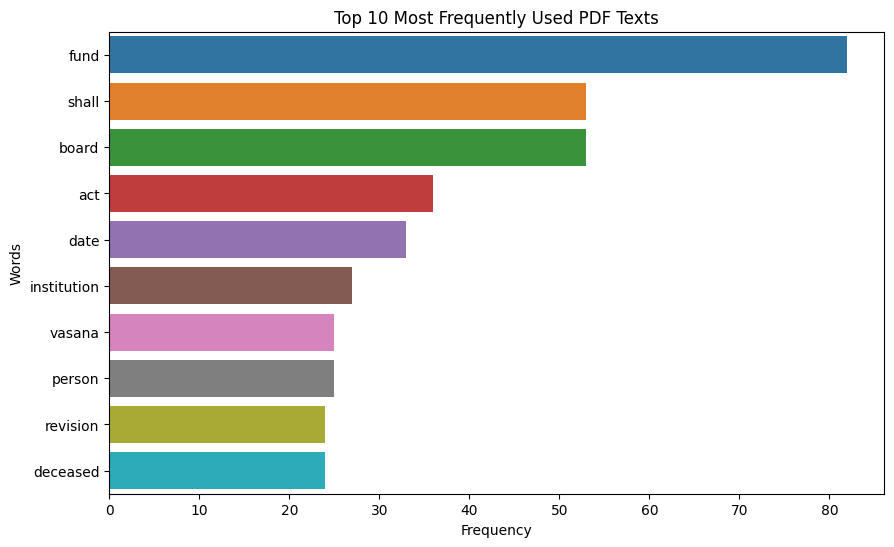

In [111]:
# Top 10 most frequently used pdf texts
top_words_chart(pdf_texts, 'Top 10 Most Frequently Used PDF Texts')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


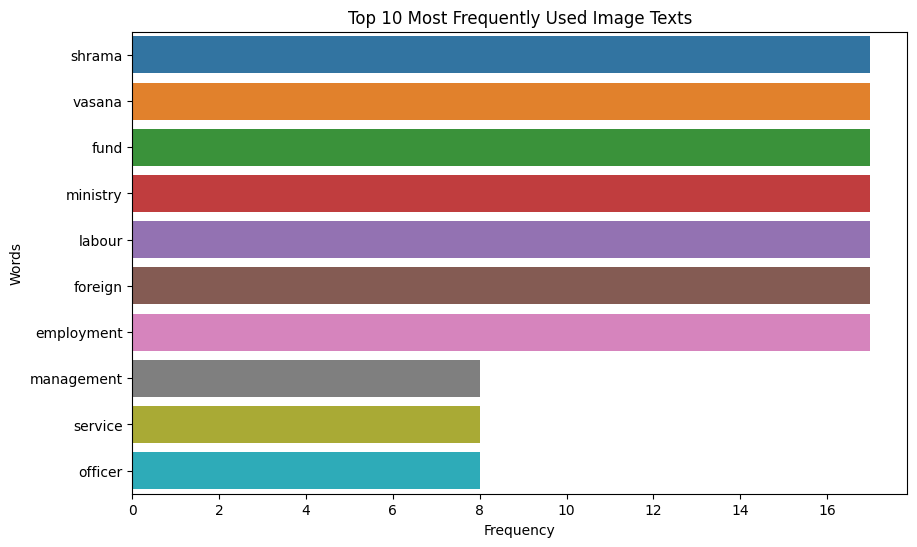

In [112]:
# Top 10 most frequently used image texts
top_words_chart(image_texts, 'Top 10 Most Frequently Used Image Texts')

In [120]:
# Bi-grams: Identify common word pairs
def n_grams(text_list, n): 
    n_grams = []
    CV = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = CV.fit_transform(texts)
    ngram_list = CV.get_feature_names_out()
    ngram_frequencies = ngrams.toarray().sum(axis=0)
    ngram_freq = sorted(list(zip(ngram_list, ngram_frequencies)), key=lambda x: x[1], reverse=True)
    for ngram, freq in ngram_freq[:10]:
        n_grams.append((ngram, freq))
    return n_grams

In [121]:
def n_grams_chart(text_list, n, title):
    texts = n_grams(text_list, n)
    words = [] 
    freqs = []
    for text, freq in texts: 
        words.append(text)
        freqs.append(freq)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=words)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


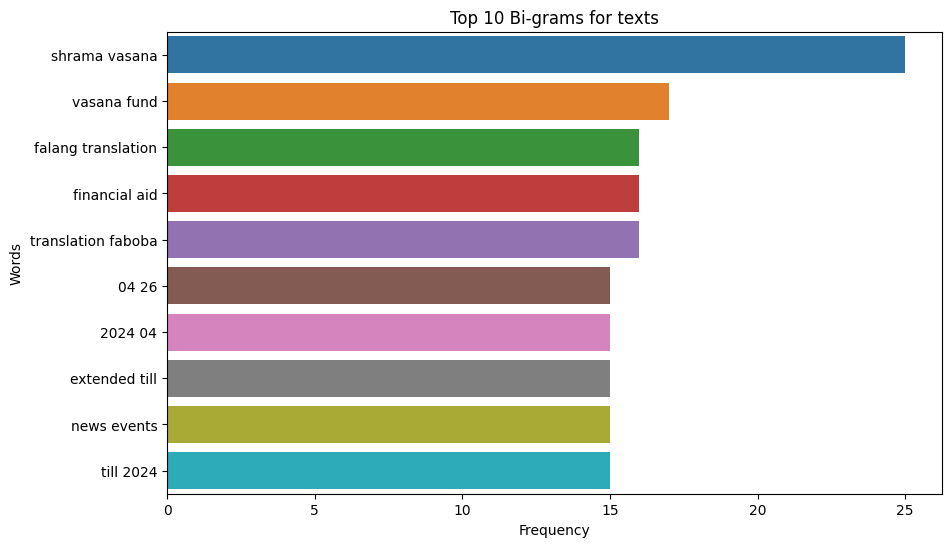

In [123]:
# Top 10 Frequently Used Word Pairs For Texts
n_grams_chart(texts, 2, "Top 10 Bi-grams for texts")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


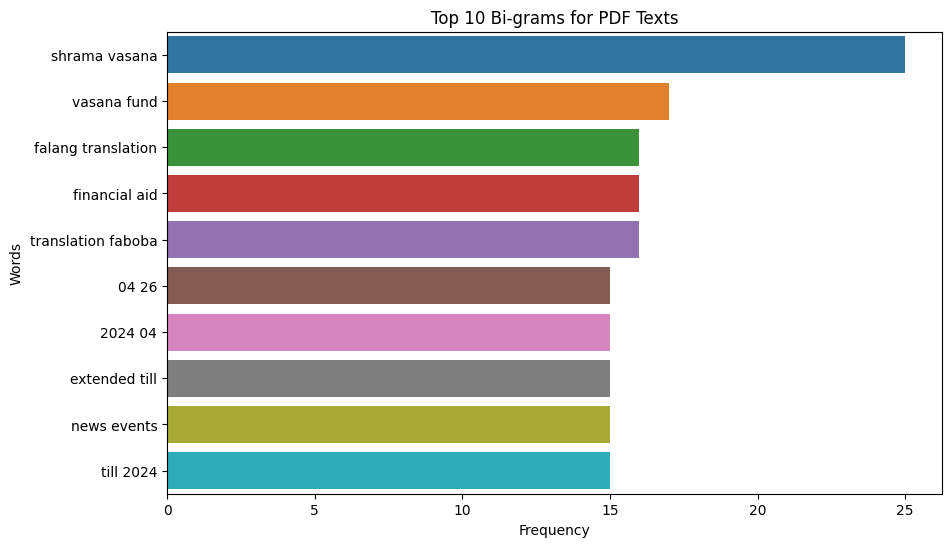

In [125]:
# Top 10 Frequently Used Word Pairs For PDF Texts
n_grams_chart(pdf_texts, 2, "Top 10 Bi-grams for PDF Texts")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1478: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


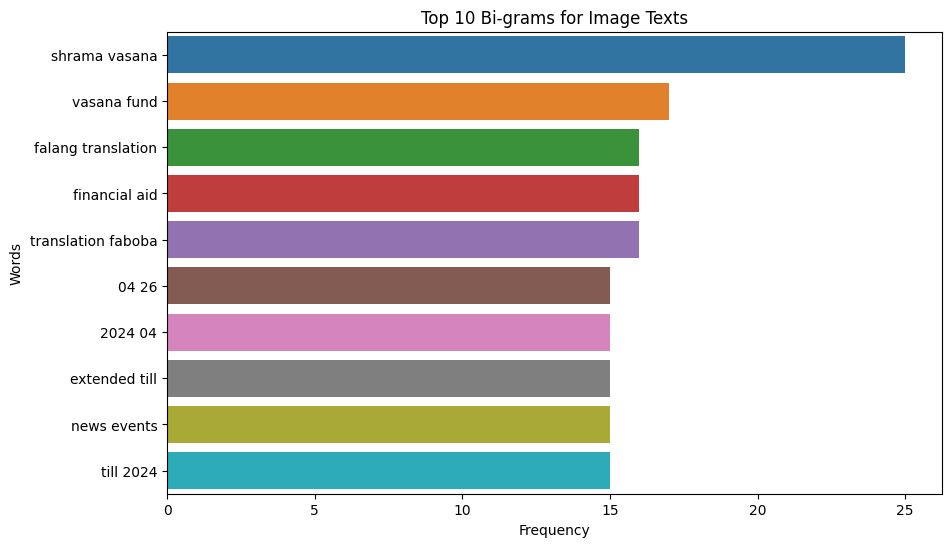

In [124]:
# Top 10 Frequently Used Word Pairs For Image Texts
n_grams_chart(image_texts, 2, "Top 10 Bi-grams for Image Texts")